In [1]:
import sys, os
sys.path.append("/cluster/home/vogtva/pde-data-gen")
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"

In [12]:
import pandas as pd
import json
import netCDF4 as nc
import src.db_tools as db_tools
from src.db_tools import (
    get_dataset,
    expand_json_column,
    filter_df,
    filter_dataset,
    make_animation,
    metrics_grid,
    plot_grid,
    plot_ball_behavior,
    plot_all_trajectories,
)
from src.classify import classify_trajectories

In [3]:
model = "bruss"
ds_id = "ball_big"
ds, output_dir = get_dataset(model, ds_id)
df = ds.df
df = expand_json_column(df, "original_point", "op", True) # Adds "op" and "op_A",...,"op_Dv" to df
df = expand_json_column(df, "initial_condition", "ic", True)
df = classify_trajectories(df)

In [4]:
df1 = filter_df(df, op_A=2)
row = df1.iloc[0]

In [ ]:
data = ds.get_data(row)
make_animation(data, f"row_{row['op']}", "out")

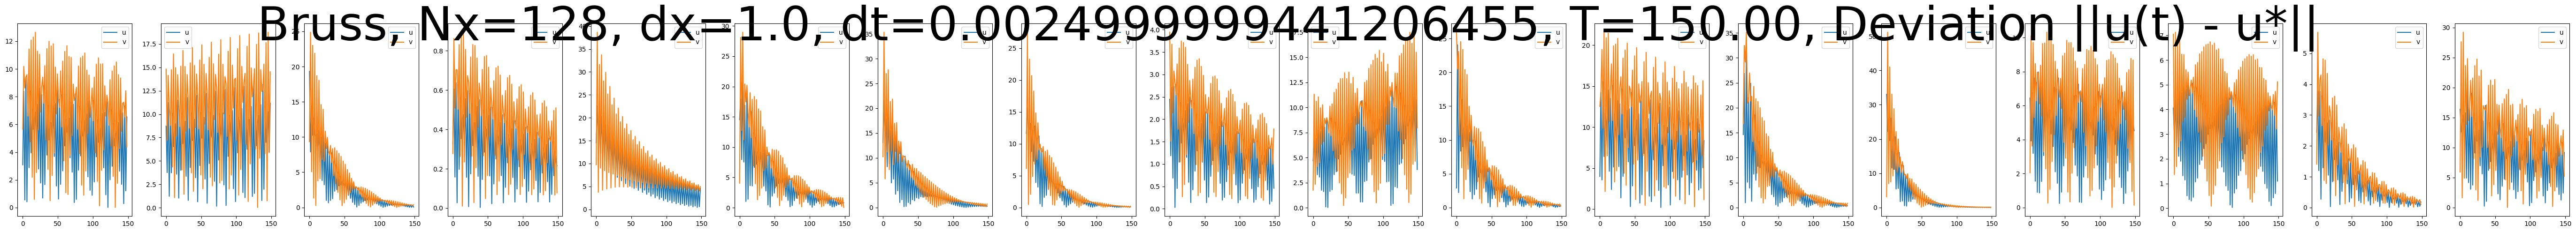

In [4]:
df1 = filter_df(df, category="INT", ic_type="normal", ic_sigma_u=0.1, op_A=1)
metrics_grid(filter_dataset(ds, df1), 0, var1="");

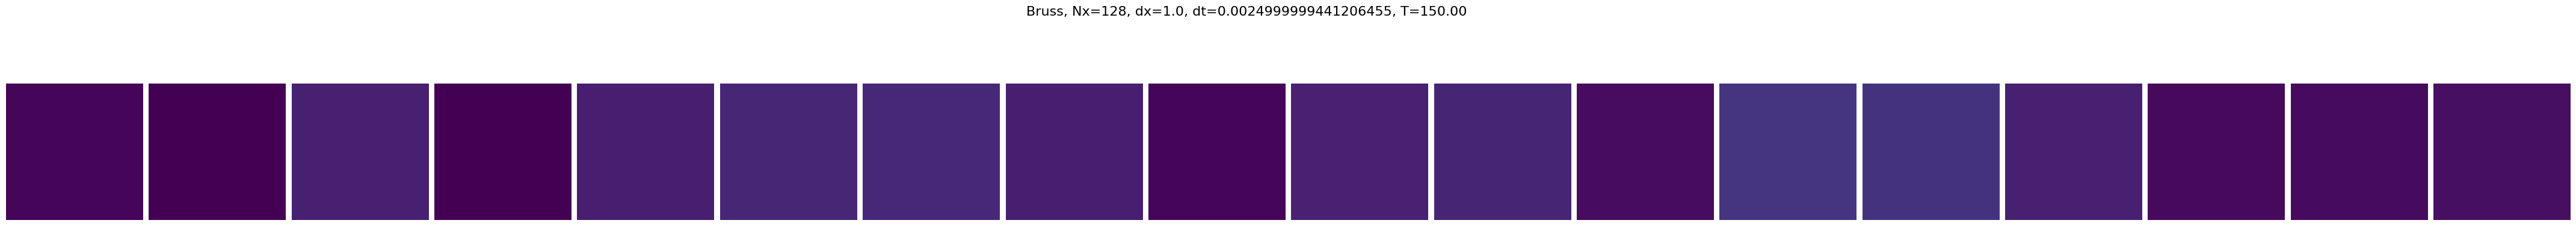

In [5]:
plot_grid(filter_dataset(ds, df1), 0, var1="")

In [14]:
df1 = filter_df(df, category = "INT")
op = df1.iloc[0]["op"]
df_op = filter_df(df1, op=op)
ds_filt = filter_dataset(ds, df_op)
plot_all_trajectories(ds_filt)

In [15]:
plot_ball_behavior(ds_filt)